In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nips-papers/paper_authors.csv
/kaggle/input/nips-papers/papers.csv
/kaggle/input/nips-papers/authors.csv
/kaggle/input/nips-papers/database.sqlite


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [4]:
df = pd.read_csv('/kaggle/input/nips-papers/authors.csv')
df.head()

,id,name
0,1,Hisashi Suzuki
1,10,David Brady
2,100,Santosh S. Venkatesh
3,1000,Charles Fefferman
4,10000,Artur Speiser


In [5]:
df.columns

Index(['id', 'name'], dtype='object')

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9784 entries, 0 to 9783
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9784 non-null   int64 
 1   name    9783 non-null   object
dtypes: int64(1), object(1)
memory usage: 153.0+ KB
None


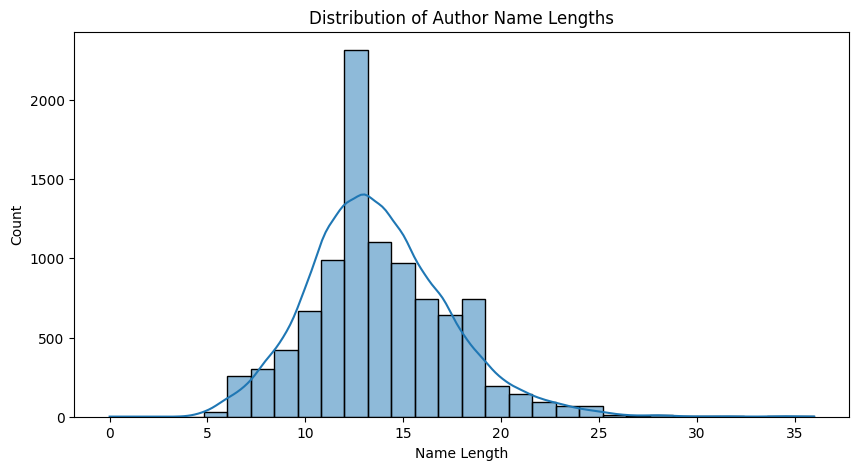

In [7]:
# Create a new column with name lengths, skipping NaN values
df['name_length'] = df['name'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Plot the distribution of name lengths
plt.figure(figsize=(10,5))
sns.histplot(df['name_length'], bins=30, kde=True)
plt.title("Distribution of Author Name Lengths")
plt.xlabel("Name Length")
plt.ylabel("Count")
plt.show()

In [8]:
df['target'] = pd.cut(df['name_length'], bins=3, labels=[0,1,2])
print(df.head())

      id                  name  name_length target
0      1        Hisashi Suzuki           14      1
1     10           David Brady           11      0
2    100  Santosh S. Venkatesh           20      1
3   1000     Charles Fefferman           17      1
4  10000         Artur Speiser           13      1


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fill missing values with empty strings
df['name'] = df['name'].fillna('')

# Create TF-IDF features
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['name'])

# Target variable
y = df['target']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results[name] = acc
    print(f"Model: {name}")
    print(classification_report(y_test, pred))
    print("----------------------------")

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.47      0.59       757
           1       0.73      0.93      0.81      1186
           2       0.00      0.00      0.00        14

    accuracy                           0.74      1957
   macro avg       0.51      0.47      0.47      1957
weighted avg       0.75      0.74      0.72      1957

----------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.79      0.46      0.59       757
           1       0.72      0.92      0.81      1186
           2       0.50      0.07      0.12        14

    accuracy                           0.74      1957
   macro avg       0.67      0.49      0.51      1957
weighted avg       0.75      0.74      0.72      1957

----------------------------
Model: Naive Bayes
              precision    recall  f1-score   support

           0       0.76      0.53      0.63       757
    

In [12]:
best_model_name = max(results, key=results.get)
print(f"Best Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")

Best Model: Naive Bayes with Accuracy: 0.7481


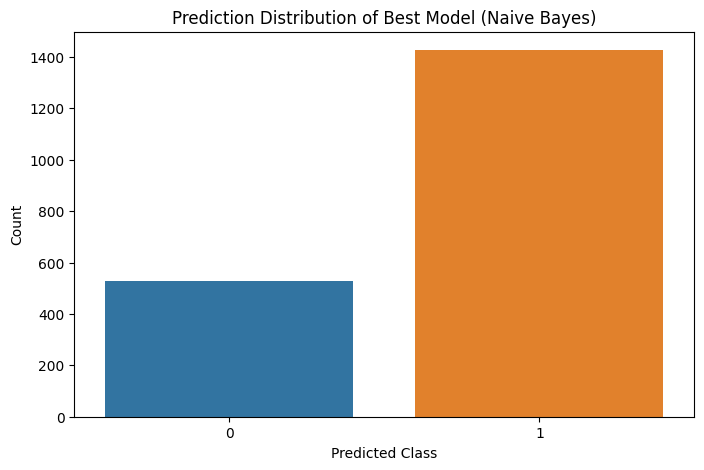

In [13]:
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8,5))
sns.countplot(x=y_pred)
plt.title(f"Prediction Distribution of Best Model ({best_model_name})")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.show()